In [1]:
#akyork
#written to analyze the 16 HMO glycans provided by Ben
import sys
import __init__
import json_utility
from glypy.io import glycoct, iupac
import extract_motif 
import customize_motif_vec 
import glycan_io
import pandas as pd
import numpy as np
import plot_glycan_utilities
import seaborn as sns
import motif_class
from importlib import reload
import clustering_analysis_pip
import matplotlib.pyplot as plt
import ndex 
from ndex.networkn import NdexGraph
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
root_addr = '/Users/apple/PycharmProjects/GlyCompare/Figure/Data/HMO/'
root_addr = '/Users/apple/PycharmProjects/GlyCompare/Figure/Data/HMO/'

# Build basic data structure

In [3]:
#run motif search on 16 HMO glycans
__init__.exact_Ture=True
#loads the json into dictionary form
hmo_dict = json_utility.load_json(root_addr+"glycanHMO_dict.json")

hmoCT_dict = {}
hmoCT_vec = []
hmoCT_name = []
hmoCT_str_vec = []
for items in hmo_dict.items():
    hmoCT_str_vec.append(items[1])
    hmoCT_dict[items[0]] = glycoct.loads(items[1])
    hmoCT_name.append(items[0])
    hmoCT_vec.append(glycoct.loads(items[1]))
#gets motifs and saves to json file
hmoMotif_dict = extract_motif.get_motif_pip(hmoCT_dict, gly_len=22, output_file=root_addr+"glycanHMO_motif_dict.json")

#turns to non-string form?                                    
hmoMotif_dict = glycan_io.glycan_str_to_glycan(json_utility.load_json(root_addr+"glycanHMO_motif_dict.json"))        


start parallel
3 0.013396024703979492
4 0.026690959930419922
4 0.02649402618408203
5 0.05120205879211426
5 0.055442094802856445
5 0.05939006805419922
6 0.0813140869140625
3 0.026127099990844727
3 0.009856939315795898
5 0.04212498664855957
5 0.04294705390930176
closing poll
joining pool
6 0.10771703720092773
7 0.16338706016540527
8 0.28919291496276855
8 0.23934197425842285
9 0.5143980979919434
finished pool


In [4]:
# merges the motif dict with the glycan dict because full chains are still considered motifs
glycan_dict_addr = root_addr+"glycanHMO_dict.json"
output_merged_motif_addr = root_addr+"glycanHMO_motif_dict.json"
master_motif_dict = customize_motif_vec.merge_motif_dict_pipe(hmoMotif_dict, output_merged_motif_addr, glycan_dict_addr)
motif_vector = glycan_io.motif_dict_to_motif_vec(master_motif_dict)

Start merge_glycan_motif_to_motif_dict
combine original
check merged motif vec len 410
get_motif_dict_degree_list_pipe
closing poll
joining pool
finished removing duplicate
after the cleaning the motif vec's length is 144
1 5
3 19
2 12
4 25
5 31
6 28
7 17
8 6
9 1
1 5
2 12
3 19
4 25
5 31
6 28
7 17
8 6
9 1
144


In [5]:
#vectorizes the occurence of the motifs per glycan
__init__.output_matched_dict_addr = root_addr+"match_dict.json"
motif_occurance_vector_dict = customize_motif_vec.motif_matching_wrapper(master_motif_dict, hmoMotif_dict, __init__.output_matched_dict_addr)

1 5
2 12
3 19
4 25
5 31
6 28
7 17
8 6
9 1
144
get motif vec, the length is  144
start processing G01650PH
start processing G98173LG
start processing G70115XG
start processing G45827GY
start processing G63053GR
start processing G48059CD
start processing G10422IZ
start processing G83916HL
start processing G24504JY
start processing G06210XB
start processing G38710SX
start processing FDSLNH
start processing G72506RN
start processing G19017MP
start processing G91237TK
start processing G47928KI
closing poll
joining pool
finished  0
finished  1
finished  2
finished  3
finished  9
finished  8
finished  12
finished  10
finished  5
finished  6
finished  7
finished  13
finished  4
finished  14
finished  11
finished  15
converting dict


# preparing the glycan_table and motif_table

In [6]:
#gets the glycan abundance data set
glycan_data = pd.read_csv(root_addr+'Data12.csv')
glycan_data = glycan_data.iloc[:48, :]
trimed_glycan_data = glycan_data.iloc[:,3:19]
trimed_sorted_glycan_data = trimed_glycan_data.sort_index(axis=1)
sorted_glycan_data_array = np.zeros((trimed_sorted_glycan_data.shape))
filtered_matrix = np.array(trimed_sorted_glycan_data)[:, :]
for i in range(trimed_sorted_glycan_data.shape[0]):
    sorted_glycan_data_array[i, :] = filtered_matrix[i, :] / sum(filtered_matrix[i, :])


In [1]:
sorted_glycan_data_array

NameError: name 'sorted_glycan_data_array' is not defined

In [6]:

####################################################################
# specific to the data set itself, only uses the 16 glycan columns #
####################################################################

# trimed_sorted_glycan_data=trimed_sorted_glycan_data[["2'FL","3'SL","3FL","DSLNT","LNFP I","LNFP II","LNFP III","LNT","LNnT","LSTb","LSTc"]]
# trimed_sorted_glycan_data.head()
# motif_data = pd.DataFrame(data=motif_occurance_vector_dict)
translation_table = {
    'G45827GY':'LNT',
    'G48059CD':'LNnT',
    'G10422IZ':'''2'FL''',
    'G06210XB':'3FL',
    'G91237TK':'''3'SL''',
    'G01650PH':'LNFP I',
    'G98173LG':'LNFP II',
    'G83916HL':'LNFP III',
    'G19017MP':'LSTb',
    'G72506RN':'LSTc',
    'G38710SX':'DSLNT',
    'G70115XG':'DFLNT',
    'G24504JY':'FLNH',
    'G63053GR':'DFLNH',
    'G47928KI':'DSLNH',
    'FDSLNH':'FDSLNH'
}

list(translation_table)
para = [translation_table[i] for i in list(translation_table)]
print({'glycan_id':list(translation_table),
      'meta_name':para})

# #changes the column names of motif data to glycan data nomenclature
# translation_list = []
# for i in list(motif_data):
#     if translation_table[i] in list(glycan_data):
#         translation_list.append(translation_table[i])
# motif_data.columns = translation_list 
# #gets each data set in similar sorted order
# sorted_motif_data = motif_data.sort_index(axis=1)
# sorted_motif_data.head()


# # sorted_motif_data=sorted_motif_data[["2'FL","3'SL","3FL","DSLNT","LNFP I","LNFP II","LNFP III","LNT","LNnT","LSTb","LSTc"]]

{'meta_name': ['FLNH', 'DFLNT', 'DSLNT', 'LSTb', 'DFLNH', 'LNT', 'DSLNH', "2'FL", 'LSTc', 'LNFP III', 'LNnT', '3FL', "3'SL", 'FDSLNH', 'LNFP II', 'LNFP I'], 'glycan_id': ['G24504JY', 'G70115XG', 'G38710SX', 'G19017MP', 'G63053GR', 'G45827GY', 'G47928KI', 'G10422IZ', 'G72506RN', 'G83916HL', 'G48059CD', 'G06210XB', 'G91237TK', 'FDSLNH', 'G98173LG', 'G01650PH']}


In [8]:
######################
#### output glycan structure
######################

for i,j in zip(hmoCT_vec, [translation_table[i] for i in hmoCT_name]):
    with open(root_addr+"hmo_" + j + ".txt", 'w') as f: 
        f.write(str(i))
        
######################
#### output motif structure
######################
for i in range(len(motif_vector)):
    with open(root_addr+name_prefix+"hmo_motif_" + str(i) + ".txt", 'w') as f: 
        f.write(str(motif_vector[i]))
plot_glycan_utilities.plot_glycan_list(motif_vector, range(len(motif_vector)), addr=root_addr+"hmo_motif_vector.eps")


NameError: name 'name_prefix' is not defined

# get glycoprofile motif abundant table

In [9]:
#matrix multiplication on the two sorted/trimed data sets to produce the motif abundance
motif_abundance = pd.DataFrame(data=np.dot(sorted_motif_data, sorted_glycan_data_array.transpose()))
hmo_motif_abundance_table = motif_abundance.drop(columns=40)
glycan_data_table = pd.DataFrame(data=sorted_glycan_data_array).drop(index=40)
dropped_hmo_motif_abundance_table= pd.DataFrame.copy(hmo_motif_abundance_table)
hmo_motif_abundance_table.to_csv(root_addr+'hmo_motif_abundance_table.csv')
hmo_motif_abundance_table.head(6)


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,41,42,43,44,45,46,47
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.267073,1.362977,1.511338,1.531817,1.554724,1.580980,1.500388,1.518672,1.905450,1.952602,...,1.544877,1.476198,1.430799,1.633853,1.664182,1.718449,1.705850,1.647205,1.663900,1.598039
2,0.842449,0.875927,0.845942,0.855008,0.850809,0.812618,0.853944,0.847818,0.704470,0.471869,...,0.846237,0.868572,0.902728,0.844347,0.846065,0.800941,0.843193,0.856390,0.872324,0.849276
3,0.267073,0.362977,0.511338,0.531817,0.554724,0.580980,0.500388,0.518672,0.905450,0.952602,...,0.544877,0.476198,0.430799,0.633853,0.664182,0.718449,0.705850,0.647205,0.663900,0.598039
4,0.207601,0.128156,0.086622,0.106763,0.077862,0.100201,0.075562,0.084787,0.257062,0.190117,...,0.141622,0.134612,0.104155,0.121175,0.134810,0.122746,0.121130,0.158237,0.146315,0.126626
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
reload(motif_class)
_motif_lab = motif_class.MotifLabwithCore(motif_vector,motif_vector[5]) # unicarbkb_motifs_12259.json
motif_vec = _motif_lab.motif_vec
tree_type_dp, edge_list = _motif_lab.get_dependence_tree_core()
_a = motif_class.NodesState(_motif_lab.motif_dep_tree_core, motif_class.get_weight_dict(hmo_motif_abundance_table))
# node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = _a.nodes_dropping_pipe(drop_diff_abund=True)
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = _a.nodes_dropping_pipe()
_collapsed_edge, _collapsed_node, _collapsed_dege_attri = _a.collapsing_potential_node()
# print(_collapsed_edge, _collapsed_node)
# print(_a.edge_attri)

# print(_a.node_attri)
# _a.upload_network(_collapsed_edge, _collapsed_node, edge_attri = _collapsed_dege_attri)
# print(_a.node_attri)
# _a.upload_network(_a.edges, _a.nodes)


RES
1b:x-dglc-HEX-1:5
2b:b-dgal-HEX-1:5
LIN
1:1o(4+1)2d

start motif_with core
len 2
len 3
len 4
len 5
len 6
len 7
len 8
len 9
Finish the n-glycan match  65  motifs are matched to the n-glycan core
start building dependence_tree
2
3
4
5
6
7
8
9
Nodes dropped []
65 129
_a.nodes 65
merged_weights_dict 65
mod nodes [5, 20, 21, 26, 35, 38, 40, 61, 62, 63, 75, 80, 86, 92, 103, 110, 121, 129, 137, 138, 143]
After first drop 44 + 21 =  65 65.0
[128, 130, 131, 135, 136, 140, 141, 142, 29, 37, 41, 43, 45, 46, 51, 53, 64, 65, 66, 73, 74, 76, 79, 81, 85, 88, 97, 98, 99, 100, 101, 102, 104, 108, 109, 112, 113, 116, 117, 122, 123, 124, 126, 127]
[]
[(5, 20), (5, 21), (5, 26), (5, 35), (20, 38), (20, 40), (38, 61), (38, 80), (38, 86), (40, 62), (40, 63), (61, 92), (75, 110), (80, 103), (110, 129), (121, 137)]
(5, 20)
(5, 21)
(5, 26)
(5, 35)
(20, 38)
(20, 40)
(38, 61)
(38, 80)
(38, 86)
(40, 62)
(40, 63)
(61, 92)
(75, 110)
(80, 103)
(110, 129)
(121, 137)
mod_nodes 21
mod_edges 16


In [21]:
for i in _a.edges:
    print(i[0],',',i[1])

5 , 20
5 , 21
5 , 26
5 , 29
5 , 35
20 , 37
20 , 38
20 , 40
20 , 41
20 , 43
20 , 51
20 , 53
26 , 43
29 , 45
29 , 46
29 , 51
37 , 61
37 , 64
38 , 61
38 , 65
38 , 79
38 , 80
38 , 85
38 , 86
40 , 62
40 , 63
40 , 73
41 , 62
41 , 74
43 , 64
43 , 65
45 , 66
45 , 75
45 , 88
46 , 66
46 , 76
51 , 73
51 , 74
51 , 75
51 , 76
51 , 81
51 , 85
53 , 80
53 , 81
61 , 92
62 , 97
62 , 113
63 , 113
63 , 116
64 , 92
65 , 92
66 , 102
73 , 97
73 , 98
73 , 100
73 , 116
74 , 97
74 , 99
74 , 101
75 , 98
75 , 99
75 , 102
75 , 104
75 , 110
75 , 117
76 , 100
76 , 101
76 , 102
79 , 103
79 , 108
80 , 103
80 , 109
81 , 104
81 , 109
85 , 108
85 , 109
85 , 110
85 , 112
86 , 112
88 , 117
97 , 121
97 , 122
97 , 130
98 , 121
98 , 123
98 , 135
98 , 136
99 , 121
99 , 124
99 , 131
100 , 122
100 , 123
101 , 122
101 , 124
102 , 123
102 , 124
103 , 126
104 , 128
108 , 126
108 , 127
109 , 126
109 , 128
110 , 127
110 , 128
110 , 129
112 , 129
113 , 130
116 , 130
116 , 135
117 , 131
117 , 136
121 , 137
121 , 140
121 , 142
122 , 137

In [11]:
# # # #replace column one with the first three columns from original Data12 to match Data12 format


# info_columns = glycan_data.iloc[:, 0:3]
# result = pd.concat([info_columns, 
#                     hmo_motif_abundance_table.transpose()], axis=1, sort=False)
# result.to_csv(root_addr+'motif_abundance.csv')

# info_columns = glycan_data.iloc[:, 0:3]
# aaaaa=_a.nodes_dropping_pipe()[2]
# result = pd.concat([info_columns, 
#                     motif_abundance[hmo_motif_abundance_table.index.isin(aaaaa)].transpose()], axis=1, sort=False)
# result.to_csv(root_addr+'motif_abundance_nodes_dropped.csv')

profile_patient_list = list(glycan_data["Pateint ID"])
profile_dpp = list(glycan_data["DPP"])
profile_name_list = []
for i,j in zip(profile_patient_list, profile_dpp):
    profile_name_list.append(i+" "+str(j))
del profile_name_list[40]


# clustermap based on core structure 

In [12]:
# name_prefix = "hmo_motif_with_core"
# # hmo_motif_abundance_table = hmo_motif_abundance_table.iloc[:, :47]
# nodes_selected = _a.nodes
# print("len", len(nodes_selected))
# _table_using = hmo_motif_abundance_table[hmo_motif_abundance_table.index.isin(nodes_selected)]
# # fig, ax = plt.subplots(figsize=(18, 9))
# g = sns.clustermap(_table_using, metric="correlation", cmap=sns.color_palette("RdBu_r", 20), z_score=0, linewidths=.01,figsize=(18,9),linecolor='black',method='complete', )
# plt.savefig(root_addr+name_prefix+'raw_abundance_zscore.eps')
# clustering_analysis_pip.draw_profile_cluster(g, _table_using, profile_name_list,name_prefix, color_threshold=0.95,)
# cccluster_dict = clustering_analysis_pip.draw_motif_cluster(g, _table_using, name_prefix, color_threshold=0.05, fig_size=(6, 15))
# plot_glycan_utilities.plot_glycan_list([motif_vec[i] for i in nodes_selected], nodes_selected, addr = root_addr+name_prefix+"motif.eps")


_a.nodes 65
merged_weights_dict 65
mod nodes [5, 20, 21, 26, 35, 38, 40, 61, 62, 63, 75, 80, 86, 92, 103, 110, 121, 129, 137, 138, 143]
After first drop 44 + 21 =  65 65.0
[128, 130, 131, 135, 136, 140, 141, 142, 29, 37, 41, 43, 45, 46, 51, 53, 64, 65, 66, 73, 74, 76, 79, 81, 85, 88, 97, 98, 99, 100, 101, 102, 104, 108, 109, 112, 113, 116, 117, 122, 123, 124, 126, 127]
[]
[(5, 20), (5, 21), (5, 26), (5, 35), (20, 38), (20, 40), (38, 61), (38, 80), (38, 86), (40, 62), (40, 63), (61, 92), (75, 110), (80, 103), (110, 129), (121, 137)]
(5, 20)
(5, 21)
(5, 26)
(5, 35)
(20, 38)
(20, 40)
(38, 61)
(38, 80)
(38, 86)
(40, 62)
(40, 63)
(61, 92)
(75, 110)
(80, 103)
(110, 129)
(121, 137)
mod_nodes 21
mod_edges 16
len 21


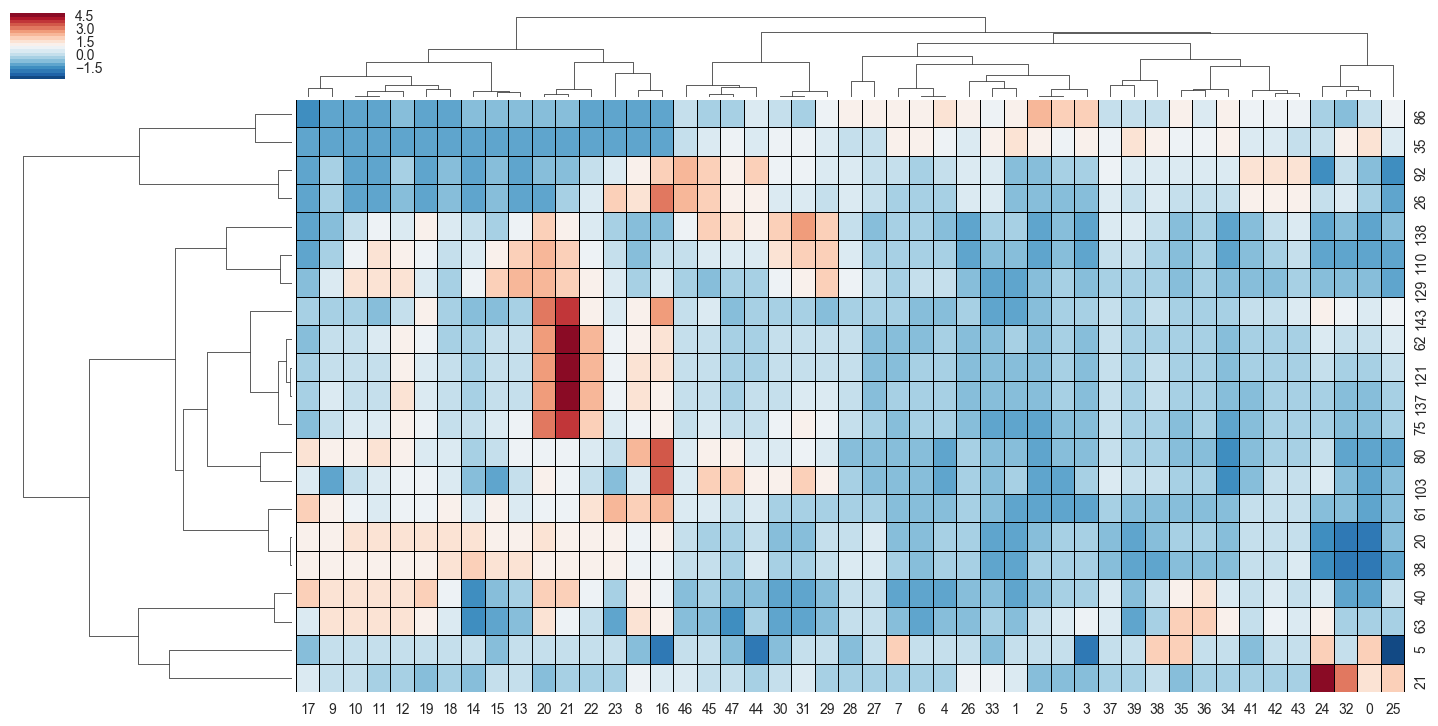

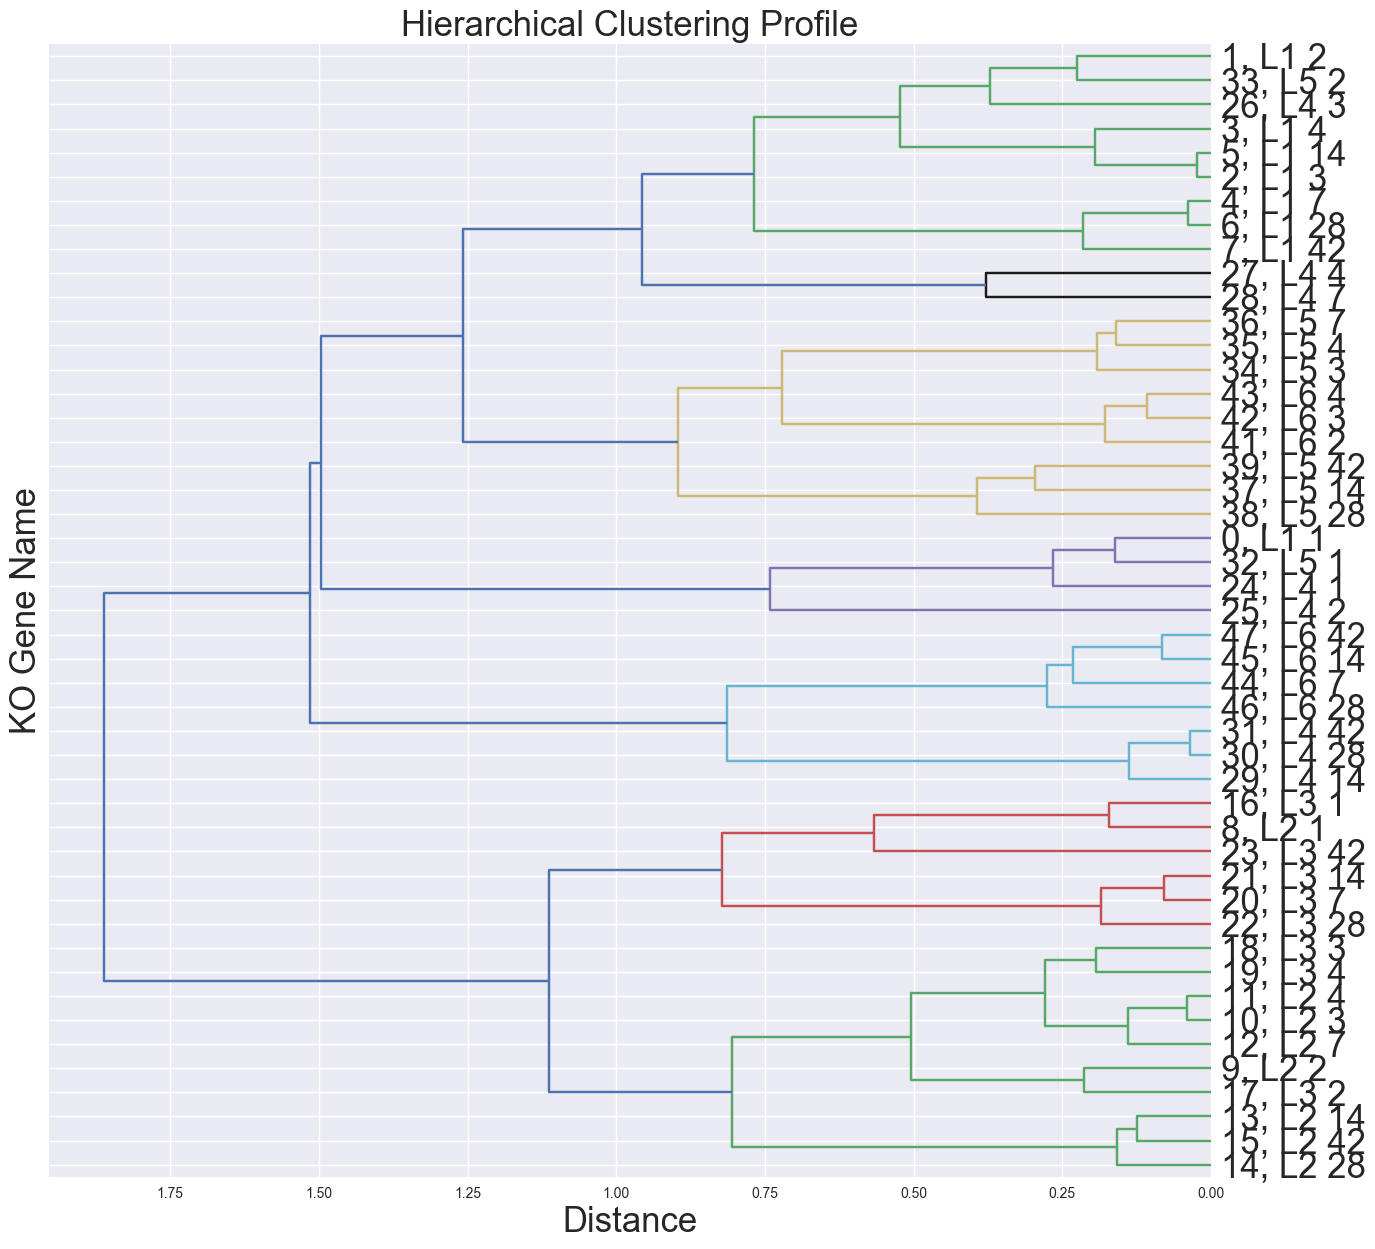

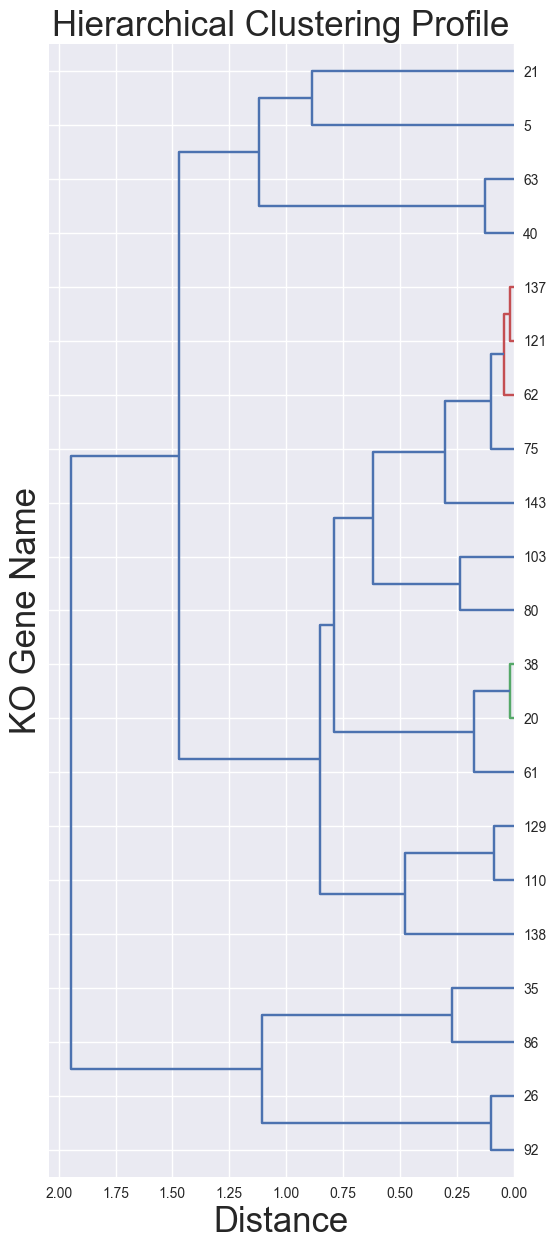

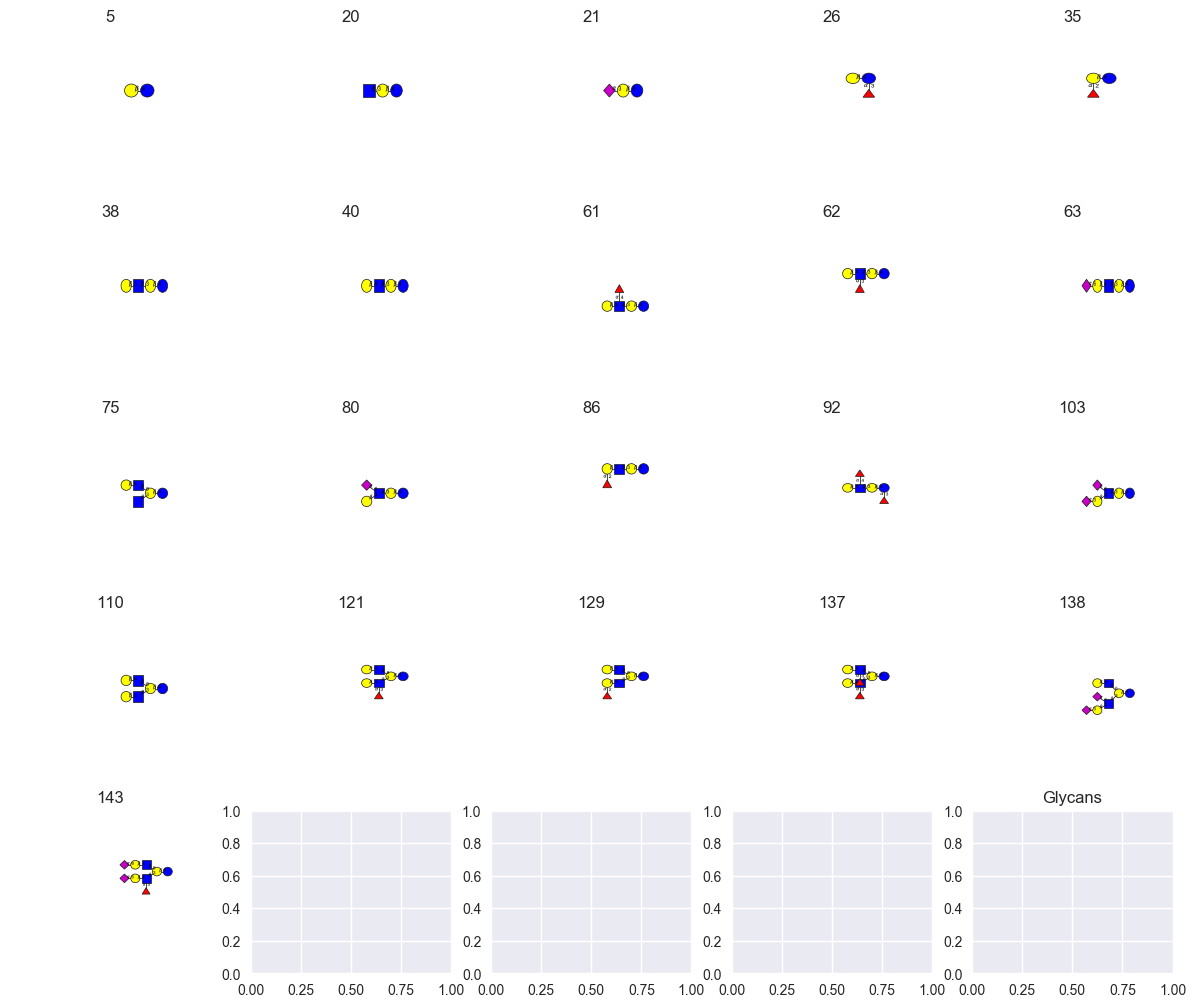

In [13]:
name_prefix = "hmo_motif_with_core_dropped_"
# hmo_motif_abundance_table = hmo_motif_abundance_table.iloc[:, :47]
nodes_selected = _a.nodes_dropping_pipe()[2]
print("len", len(nodes_selected))
_table_using = hmo_motif_abundance_table[hmo_motif_abundance_table.index.isin(nodes_selected)]
_table_using.to_csv(root_addr+name_prefix+'abundance_table.csv')
# fig, ax = plt.subplots(figsize=(18, 9))
g = sns.clustermap(_table_using, metric="correlation", cmap=sns.color_palette("RdBu_r", 20), z_score=0, linewidths=.01,figsize=(18,9),linecolor='black',method='complete', )
plt.savefig(root_addr+name_prefix+'raw_abundance_zscore.eps')
clustering_analysis_pip.draw_profile_cluster(g, _table_using, profile_name_list,name_prefix, color_threshold=0.95,)
cccluster_dict = clustering_analysis_pip.draw_motif_cluster(g, _table_using, name_prefix, color_threshold=0.05, fig_size=(6, 15))
plot_glycan_utilities.plot_glycan_list([motif_vec[i] for i in nodes_selected], nodes_selected, addr = root_addr+name_prefix+"motif.eps")


In [14]:
# for i in _collapsed_node:
#     if _a.node_attri[i]['kept'] == 'yes':
#         with open("/Users/apple/PycharmProjects/GlyCompare/hmo/motif_collapsed_node_med" + str(i) + ".txt", 'w') as f: 
#             f.write(str(motif_vec[i]))
#     if _a.node_attri[i]['kept'] == 'med_root':
#         with open("/Users/apple/PycharmProjects/GlyCompare/hmo/motif_collapsed_node_med" + str(i) + ".txt", 'w') as f: 
#             f.write(str(motif_vec[i]))
#     if _a.node_attri[i]['kept'] == 'immd':
#         with open("/Users/apple/PycharmProjects/GlyCompare/hmo/motif_collapsed_node_med_notimp" + str(i) + ".txt", 'w') as f: 
#             f.write(str(motif_vec[i]))

# Ploting the cluster for motif, nothing about core

<class 'str'>
start building dependence_tree
1
2
3
4
5
6
7
8
9
Nodes dropped []
144 270
_a.nodes 144
merged_weights_dict 144
mod nodes [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 16, 17, 19, 20, 21, 22, 23, 25, 26, 32, 34, 35, 36, 38, 39, 40, 42, 49, 52, 55, 58, 59, 61, 62, 63, 75, 77, 80, 84, 86, 92, 93, 103, 110, 111, 120, 121, 125, 129, 137, 138, 139, 143]
After first drop 91 + 53 =  144 144.0
drop same level 7 19
7
drop same level 7 38
7
drop same level 8 20
8
drop same level 12 25
12
drop same level 17 36
17
drop same level 17 61
17
drop same level 19 38
19
drop same level 23 40
23
drop same level 32 55
32
drop same level 32 80
32
drop same level 34 58
34
drop same level 34 86
34
drop same level 36 61
36
drop same level 39 62
39
drop same level 42 63
42
drop same level 49 75
49
drop same level 52 77
52
drop same level 52 103
52
drop same level 55 80
55
drop same level 58 86
58
drop same level 59 139
59
drop same level 59 143
59
drop same level 77 103
77
drop same level 84 110
84
drop same le

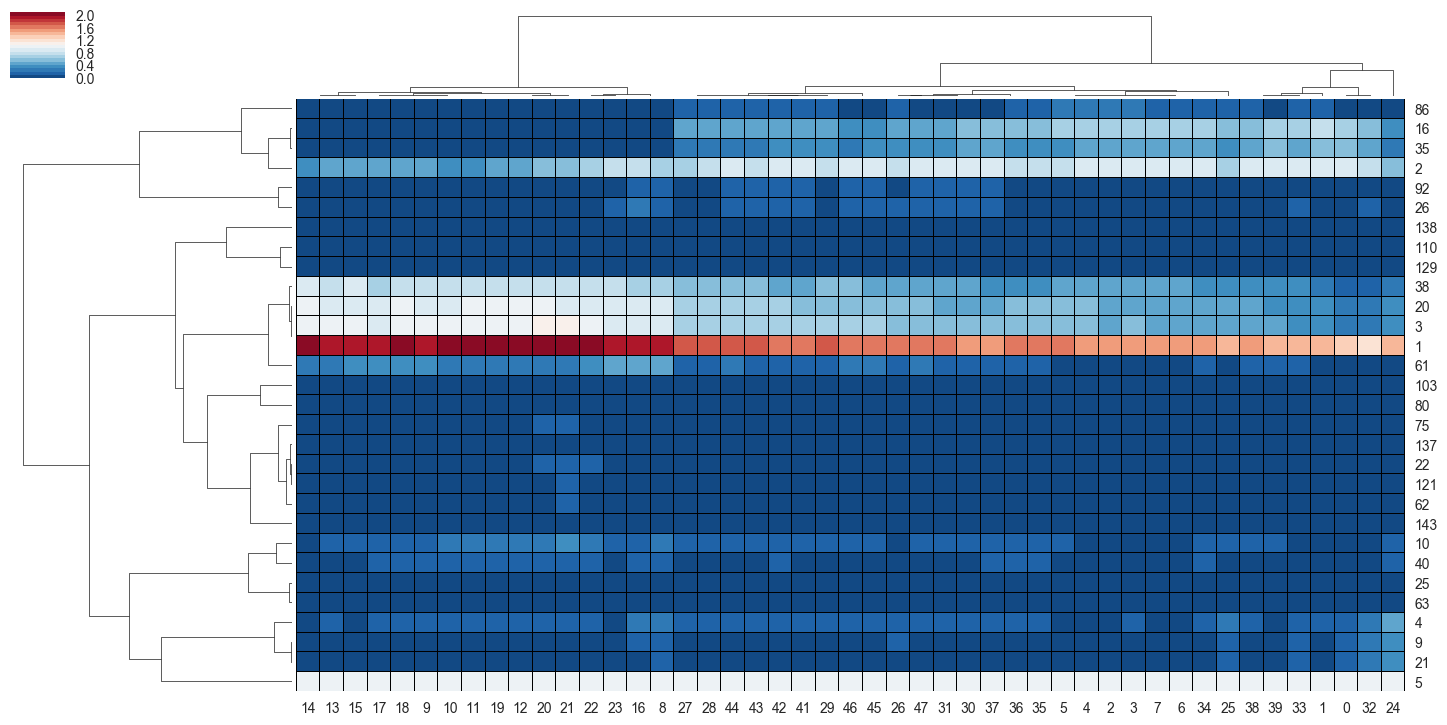

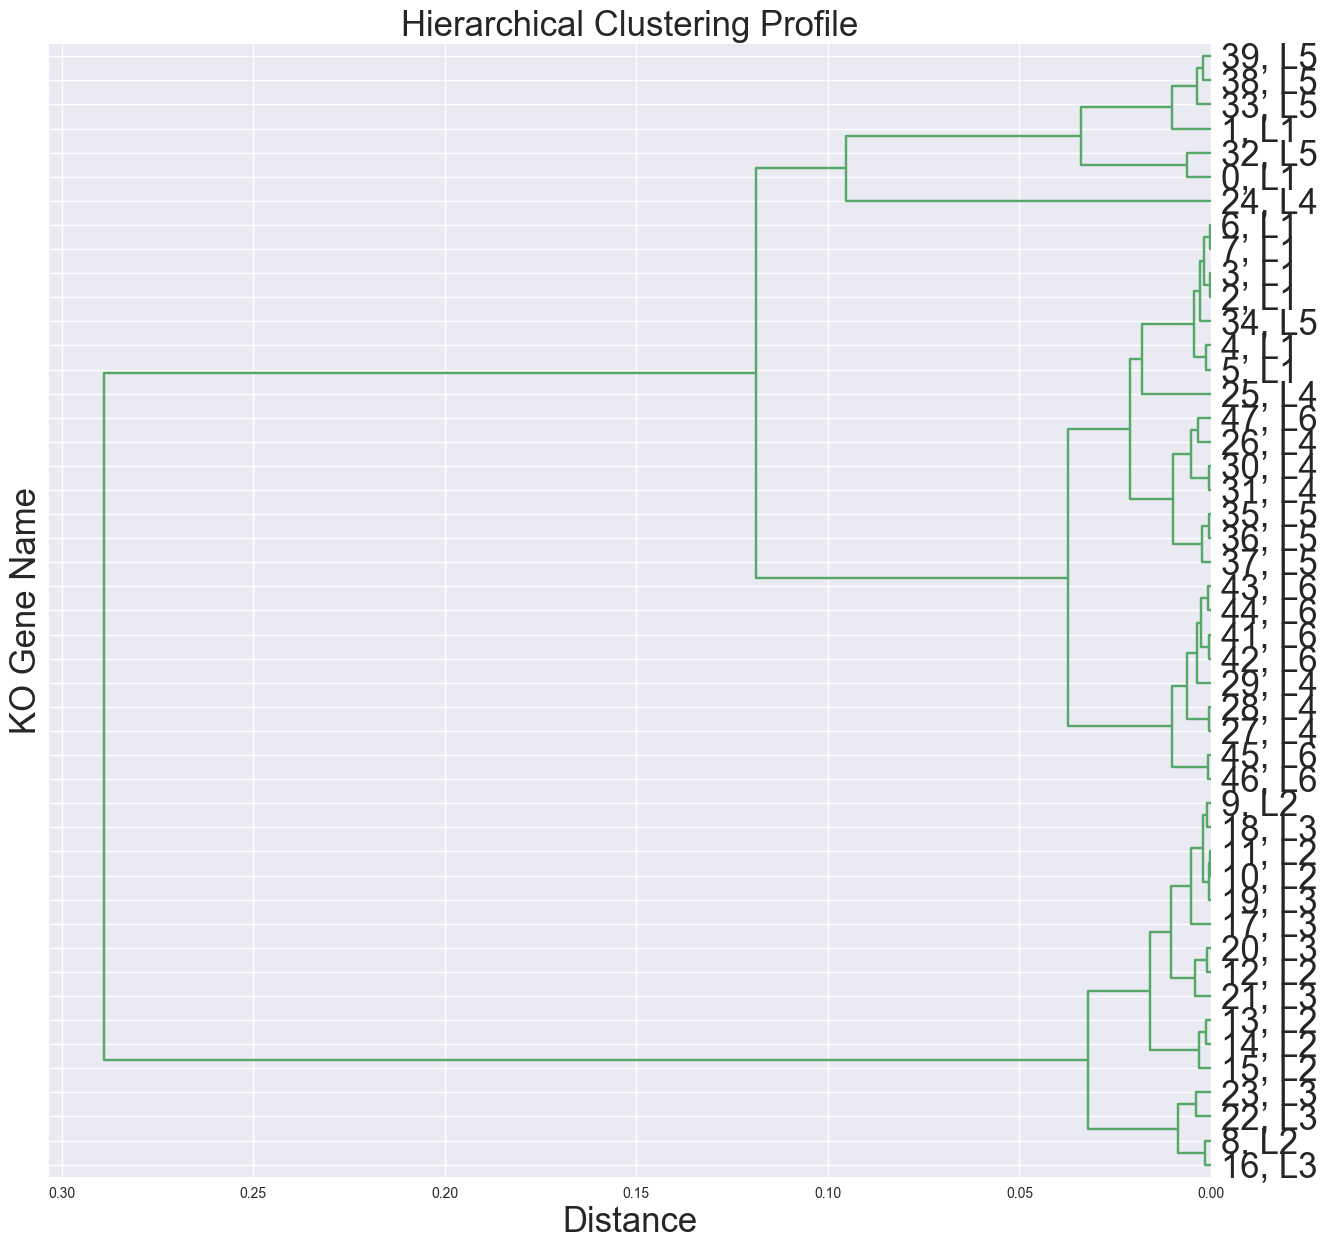

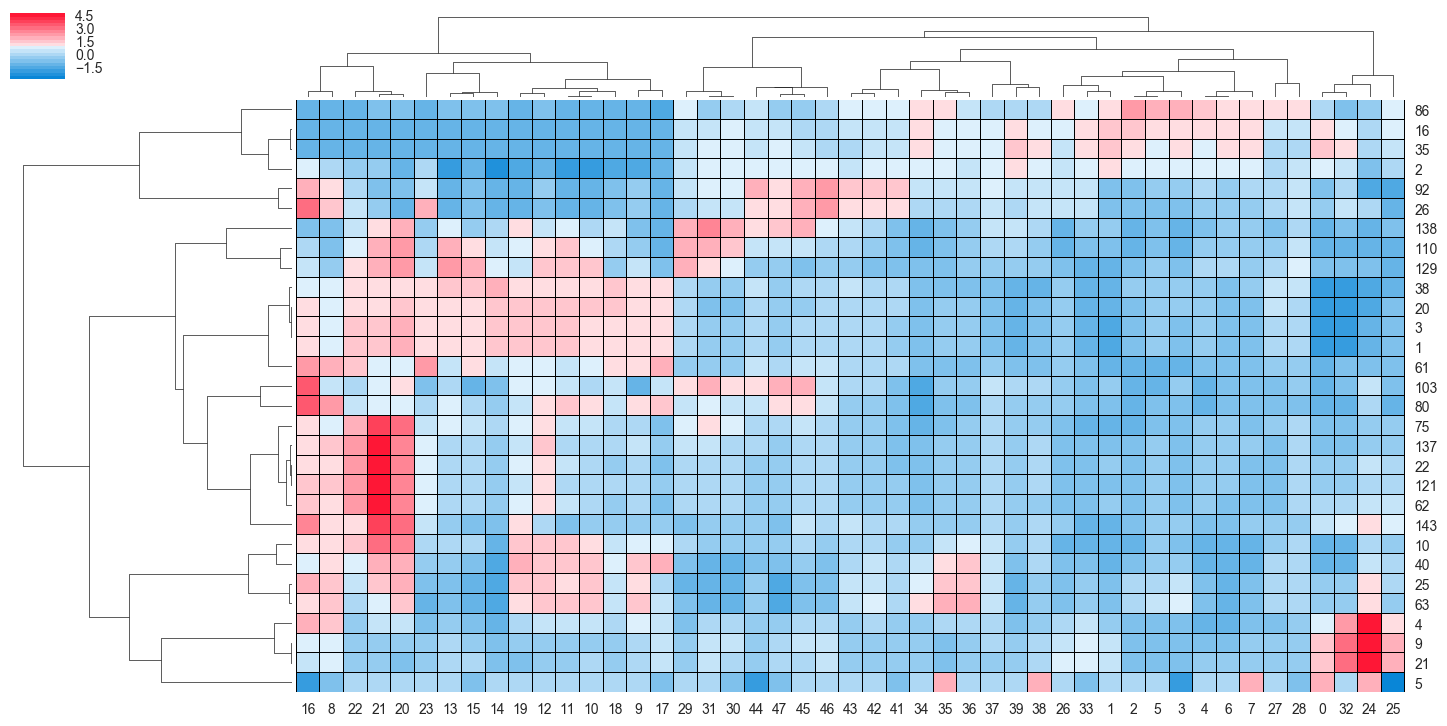

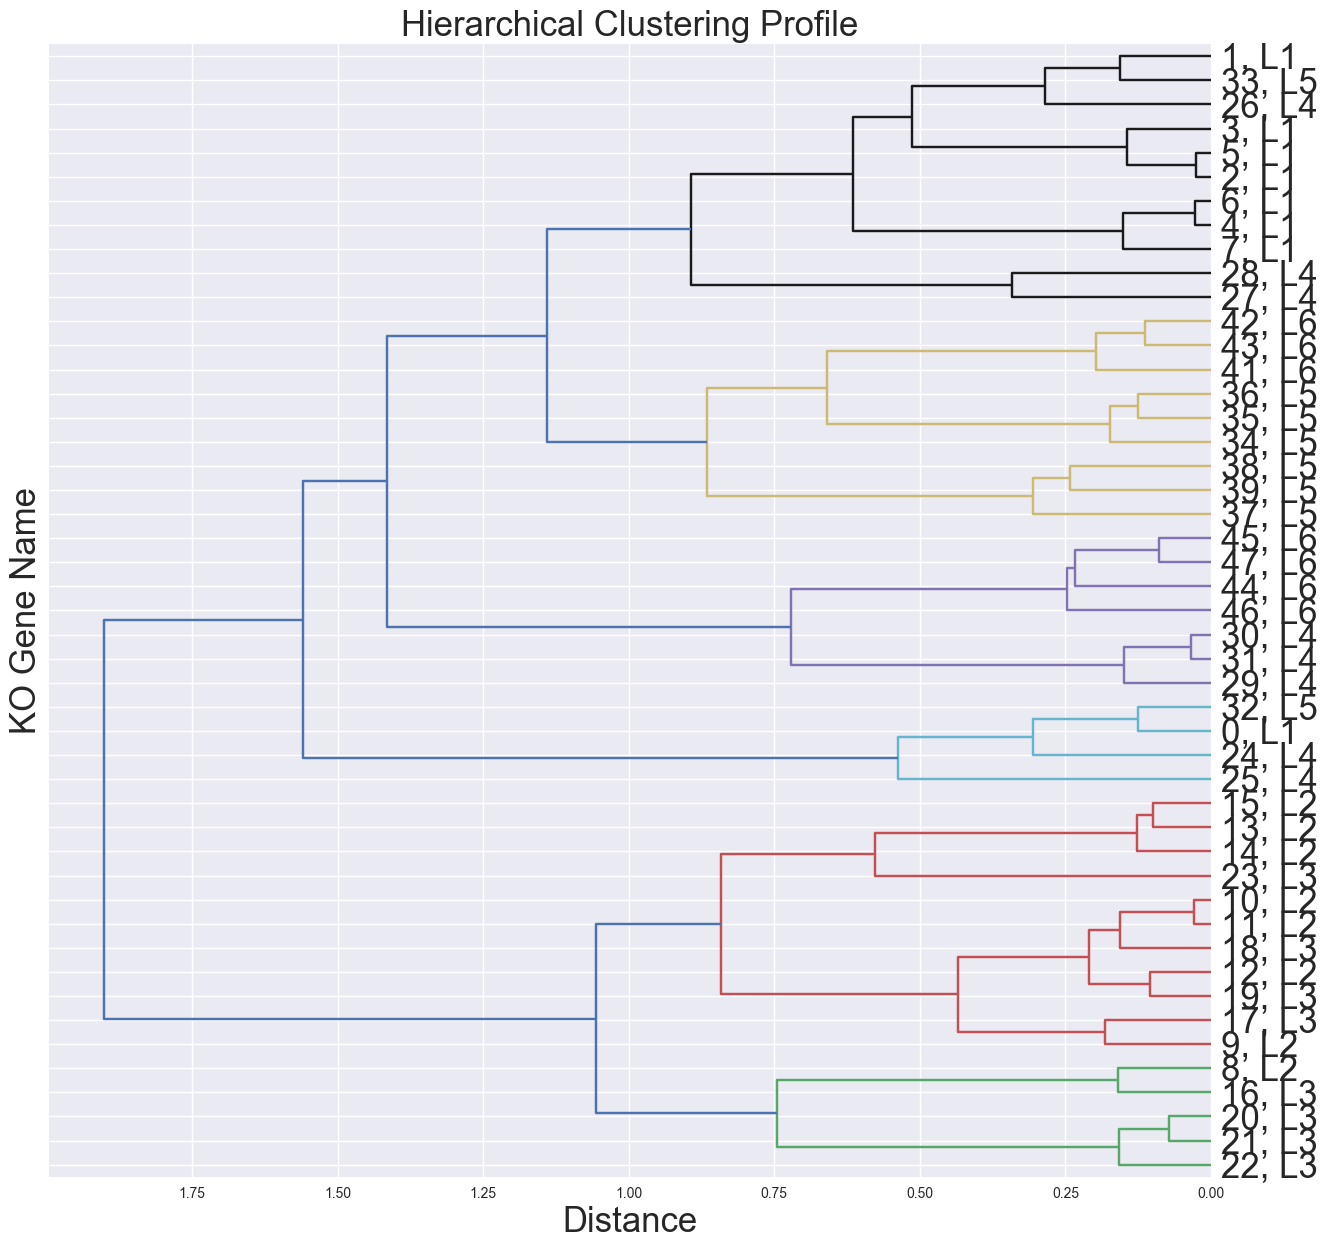

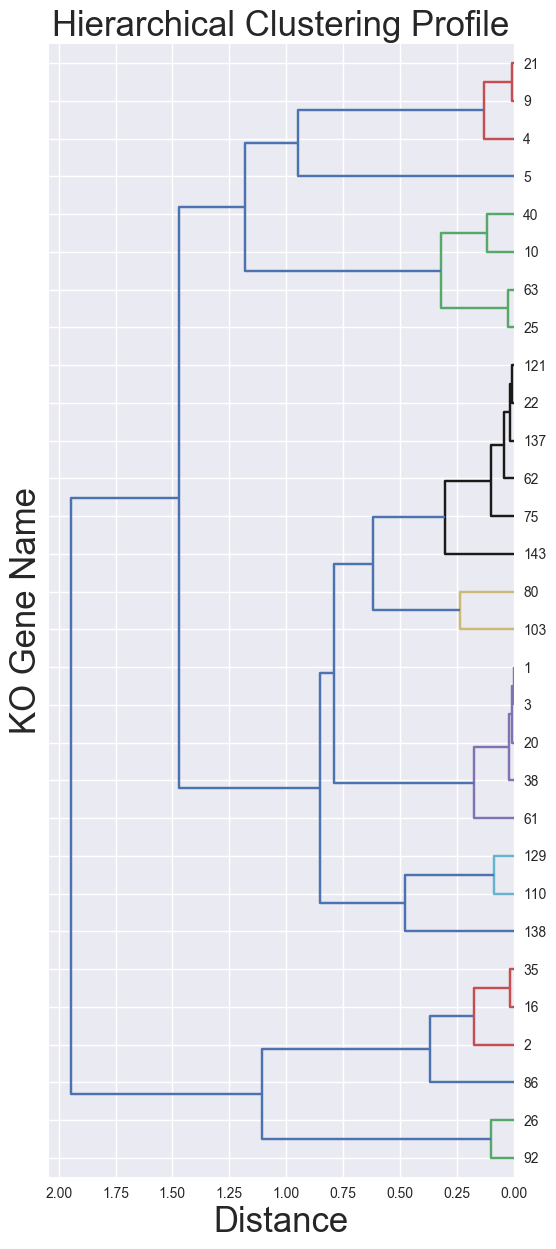

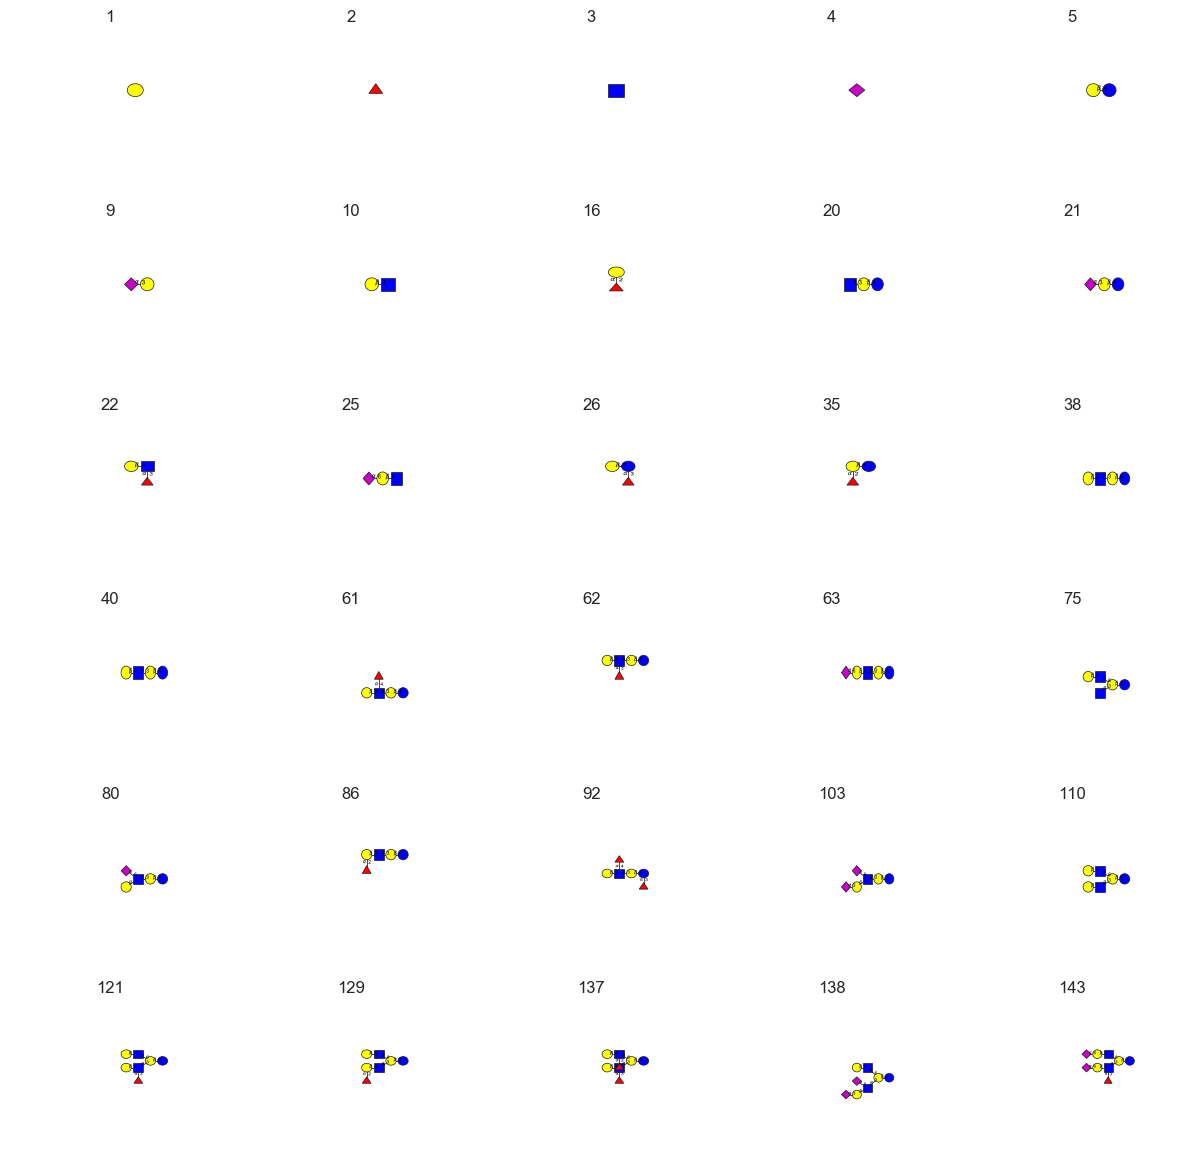

In [15]:
reload(motif_class)
_motif_lab = motif_class.MotifLab(json_utility.load_json(output_merged_motif_addr)) # unicarbkb_motifs_12259.json
motif_vec = _motif_lab.motif_vec
tree_type_dp, edge_list = _motif_lab.get_dependence_tree_all()

_b = motif_class.NodesState(_motif_lab.motif_dep_tree, motif_class.get_weight_dict(hmo_motif_abundance_table))
nodes_selected = _b.nodes_dropping_pipe(drop_parellel=True)[2]
info_columns = glycan_data.iloc[:, 0:3]
result_b = pd.concat([info_columns, 
                    motif_abundance[motif_abundance.index.isin(nodes_selected)].transpose()], axis=1, sort=False)
# result_b = result_b.drop(index=40)
_b.upload_network(_b.edges, _b.nodes)
name_prefix = "hmo_motif_no_core_"
result_b.to_csv(root_addr+name_prefix+'abundance_table.csv')
# hmo_motif_abundance_table = hmo_motif_abundance_table.iloc[:, :47]
# print("len", len(nodes_selected))
# selected_node =_b.nodes_dropping_pipe()[2]
# fig, ax = plt.subplots(figsize=(18, 9))
print("len", len(nodes_selected))
_table_using = hmo_motif_abundance_table[hmo_motif_abundance_table.index.isin(nodes_selected)]
profile_name_list = list(glycan_data["Pateint ID"])
del profile_name_list[40]
g = sns.clustermap(_table_using, metric="correlation", cmap=sns.color_palette("RdBu_r", 20), linewidths=.01,figsize=(18,9),linecolor='black',method='complete', )
clustering_analysis_pip.draw_profile_cluster(g, _table_using, profile_name_list,name_prefix, color_threshold=0.95,)

g = sns.clustermap(_table_using, metric="correlation",cmap=sns.diverging_palette(247,10,99,54,1,20),z_score=0, linewidths=.01,figsize=(18,9),linecolor='black',method='complete', )
plt.savefig(root_addr+name_prefix+'clustermap_zscore.eps')
clustering_analysis_pip.draw_profile_cluster(g, _table_using, profile_name_list,name_prefix, color_threshold=0.95,)
cccluster_dict = clustering_analysis_pip.draw_motif_cluster(g, _table_using, name_prefix, color_threshold=0.33, fig_size=(6, 15))
plot_glycan_utilities.plot_glycan_list([motif_vec[i] for i in nodes_selected], nodes_selected, addr = root_addr+name_prefix+"motif.eps")




# Plotting complete glycan

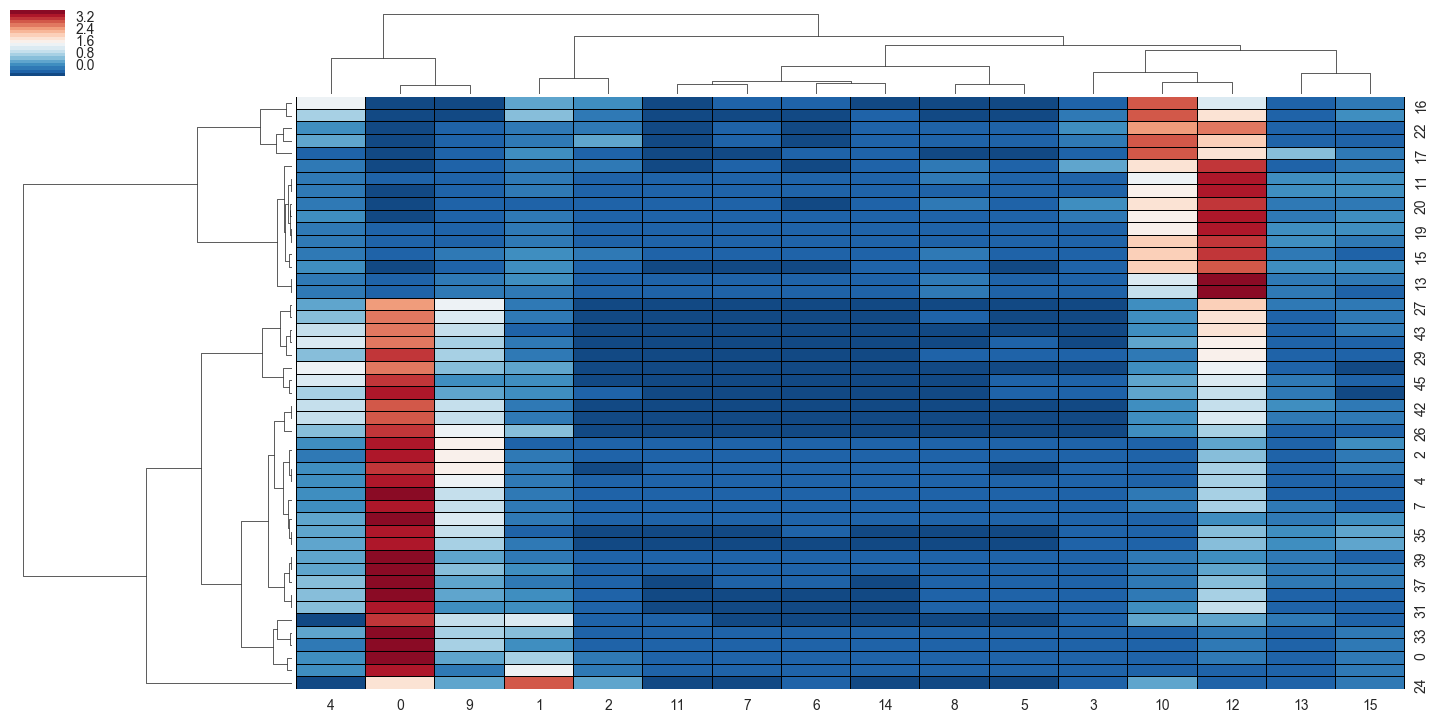

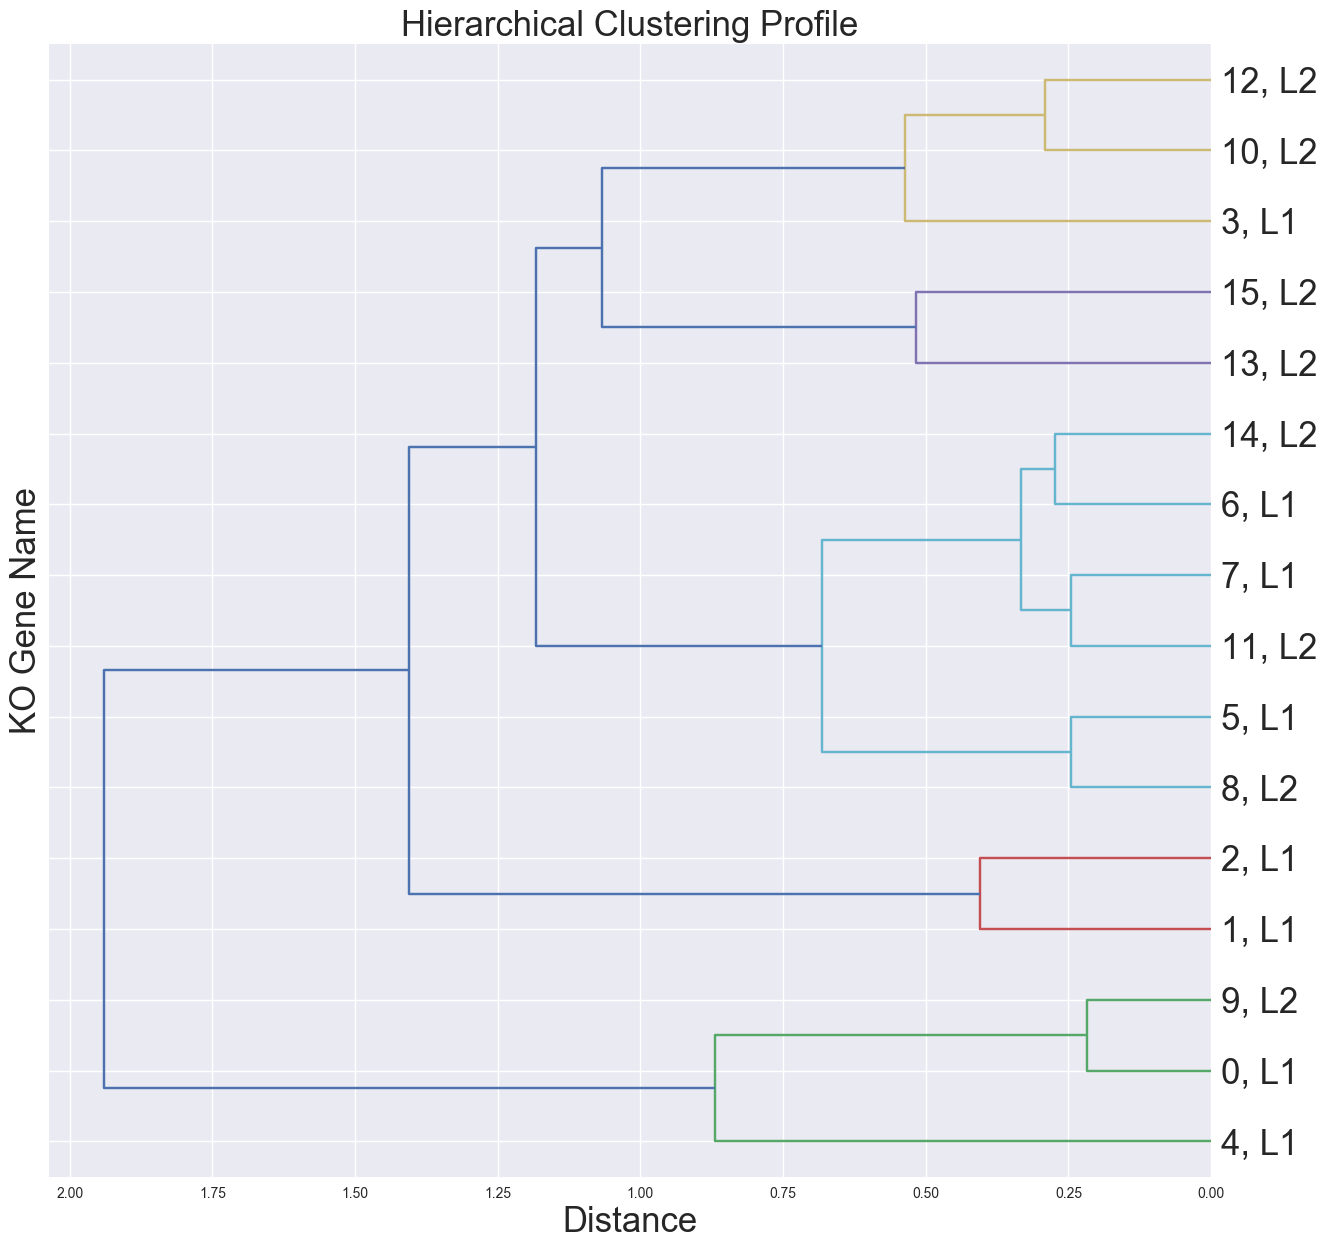

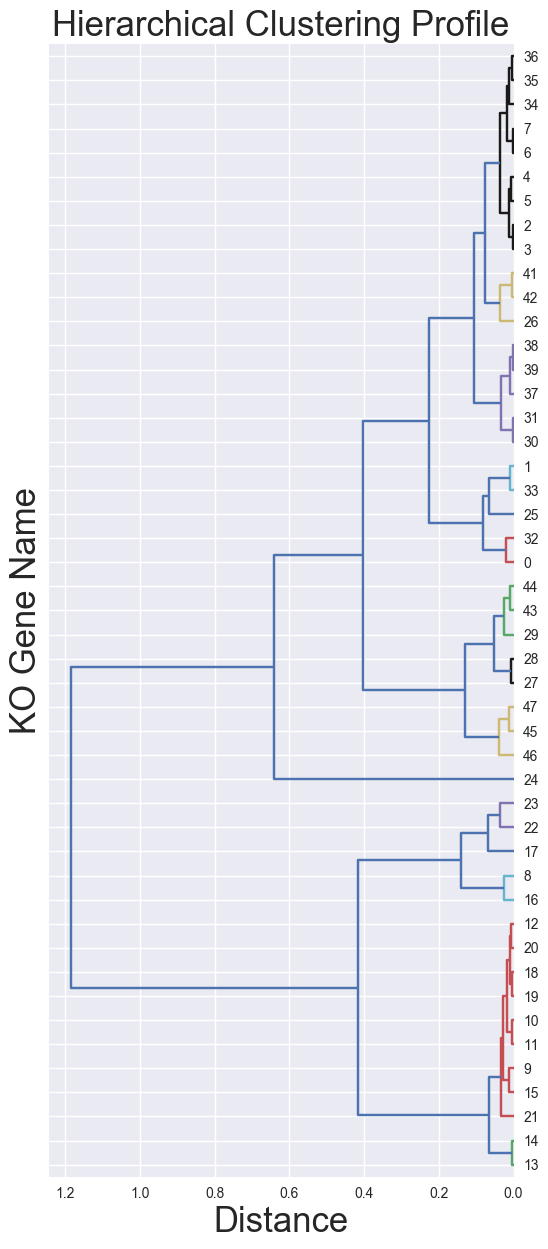

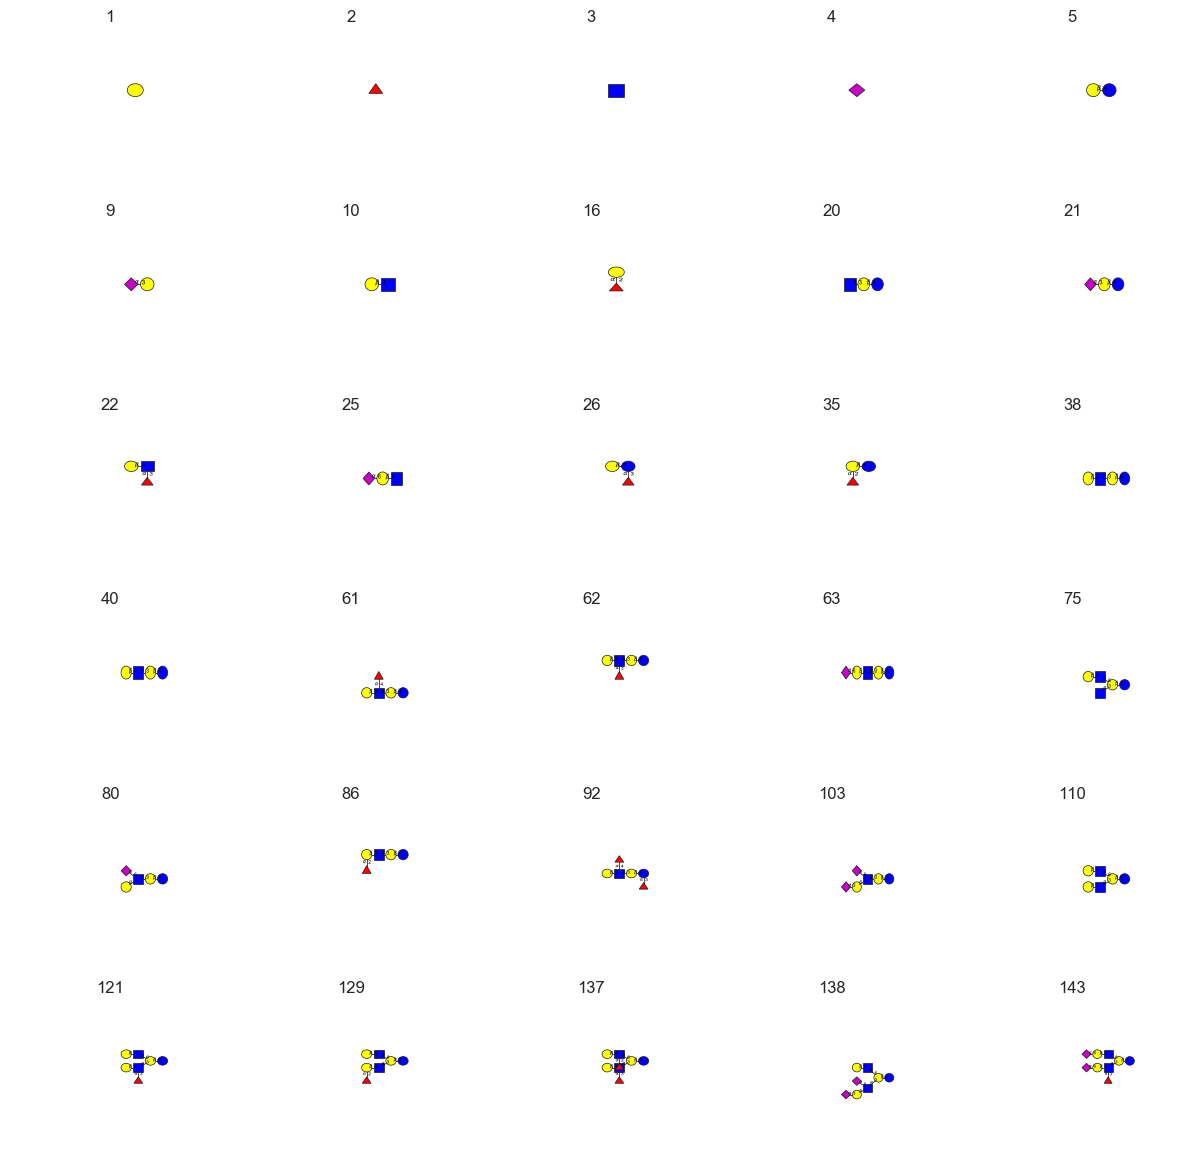

In [16]:
name_prefix = "hmo_glycan_"
# hmo_motif_abundance_table = hmo_motif_abundance_table.iloc[:, :47]
_table_using = glycan_data_table
# fig, ax = plt.subplots(figsize=(18, 9))
g = sns.clustermap(_table_using, metric="correlation", cmap=sns.color_palette("RdBu_r", 20), z_score=0, linewidths=.01,figsize=(18,9),linecolor='black',method='complete', )
plt.savefig(root_addr+name_prefix+'clustermap_zscore.eps')
clustering_analysis_pip.draw_profile_cluster(g, _table_using, profile_name_list,name_prefix, color_threshold=0.95,)
cccluster_dict = clustering_analysis_pip.draw_motif_cluster(g, _table_using, name_prefix, color_threshold=0.05, fig_size=(6, 15))
plot_glycan_utilities.plot_glycan_list([motif_vec[i] for i in nodes_selected], nodes_selected, addr = root_addr+name_prefix+"motif.eps")
